## 1. Centrality를 활용한 레 미제라블의 중심 인물 분석

### 1.0 데이터의 그래프 표현

In [1]:
# 데이터 풀러오고 node, edge로 표현
import csv, networkx as nx, operator
import matplotlib.pyplot as plt

reader = csv.reader(open('lesmis.csv', 'r'), delimiter=',')
data = [row for row in reader]

nodes = set([row[0] for row in data])
edges = [(row[0], row[2]) for row in data]

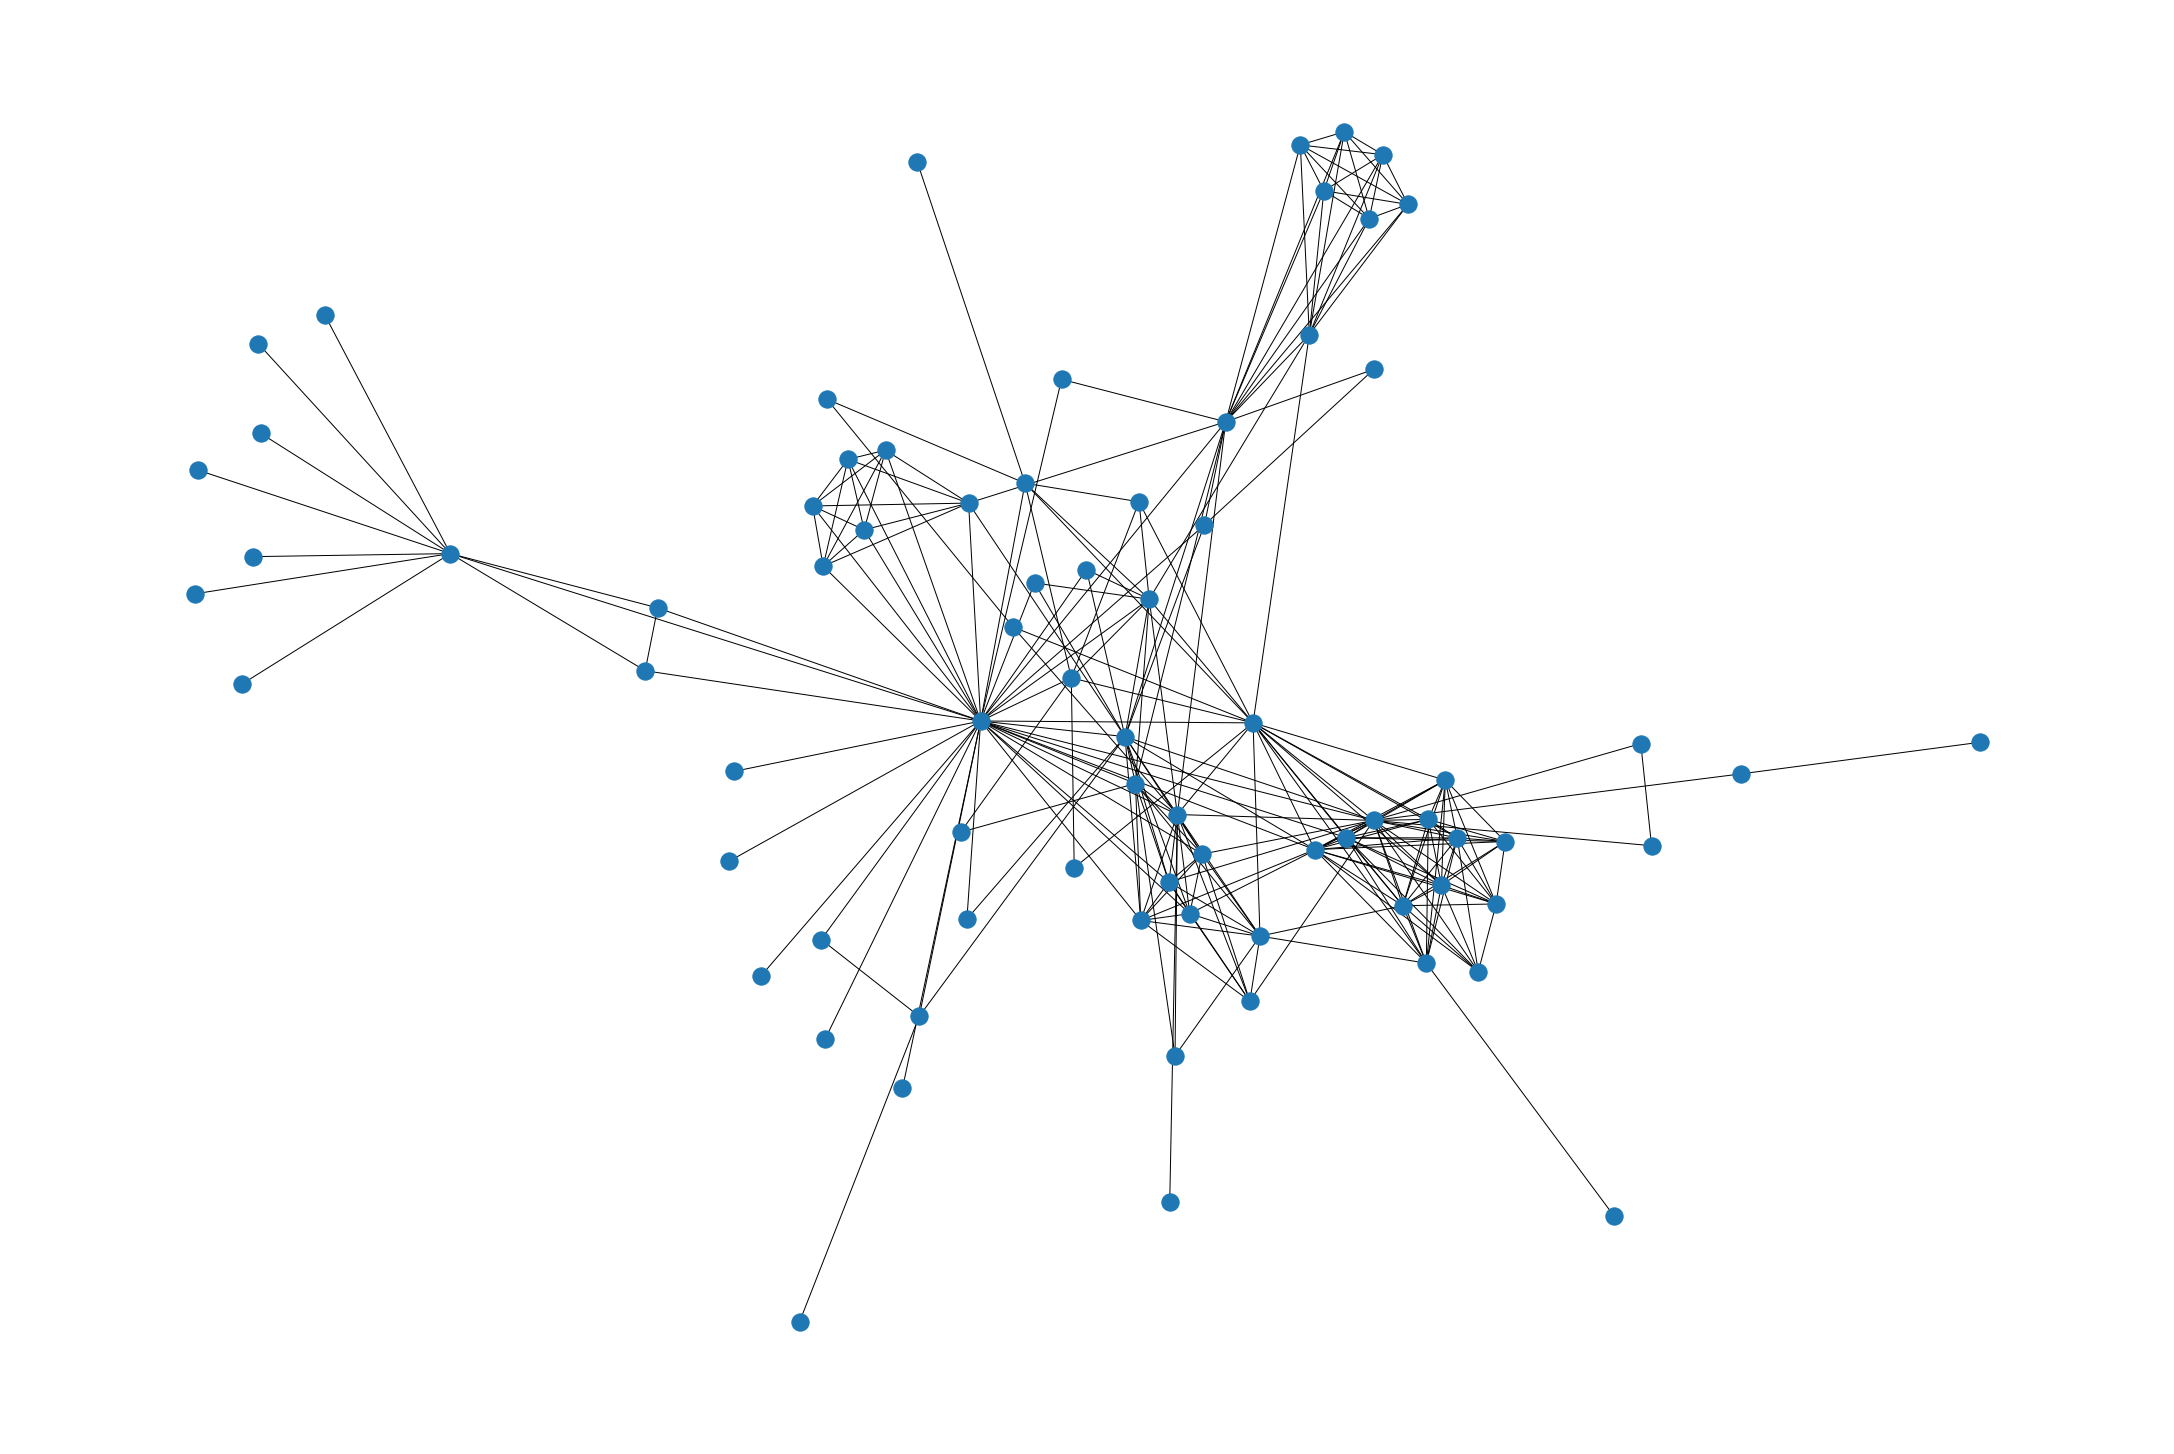

In [2]:
# 그래프 표현

g = nx.Graph()

g.add_nodes_from(nodes)
g.add_edges_from(edges)

plt.figure(figsize=(30,20))
nx.draw(g)
plt.show()

#### 장편의 소설인 만큼 등장인물 수가 많음을 확인할 수 있다. 
#### 또한, 육안으로 구분되는 클러스터가 여러 개 존재하면서도 각 클러스터가 긴밀하게 연결되어 있다는 점은 인물 관계가 복잡하다는 것을 암시한다. 
#### 특히 대부분의 클러스터와 긴밀히 연결되어 있어 네트워크 상 structural hole에 위치하는 인물이 소설의 가장 중요한 주인공인 '장발장'임을 추측할 수 있다.

- 레미제라블의 주요 인물을 열 명으로 정리하자면, [장발장, 미리엘, 코제트, 팡틴, 마리우스, 질노르망, 앙졸라, 마리우스, 에포닌, 테나르디에, 가브로슈]이다(리스트 정렬 순서는 중요도와 무관하다).

### 1.1 Degree Centrality

In [3]:
def print_top5(cent_type, cent_list):
    k=1
    for x in cent_list:
        print(f"{cent_type}가 {k}번째로 큰 인물은 {x[0]}이다.")
        k+=1

In [4]:
d_cent = nx.degree_centrality(g)
d_top5 = sorted(d_cent.items(), key=lambda x: x[1], reverse=True)
d_top5 = d_top5[0:5]
print(d_top5)

print_top5('Degree Centrality', d_top5)

[('Valjean', 0.47368421052631576), ('Gavroche', 0.2894736842105263), ('Marius', 0.25), ('Javert', 0.22368421052631576), ('Thenardier', 0.21052631578947367)]
Degree Centrality가 1번째로 큰 인물은 Valjean이다.
Degree Centrality가 2번째로 큰 인물은 Gavroche이다.
Degree Centrality가 3번째로 큰 인물은 Marius이다.
Degree Centrality가 4번째로 큰 인물은 Javert이다.
Degree Centrality가 5번째로 큰 인물은 Thenardier이다.


- Degree Centrality는 연결된 인물이 많을수록, 즉 인물과의 연결 '개수'가 많을수록 더 중요한 인물이라고 가정한다.

- 장발장은 주인공인 만큼 여러 인물과 연결되어 있으며, 가브로슈와 마리우스는 혁명단에 속하여 혁명단 인원과 6월 봉기에 참여한 인원(ex.마뵈프) 및 여러 가족 구성원과 모두 연결되어 있다. 
- 자베르 경감은 소설 속 여러 등장인물(장발장, 자베르, 마리우스, 테나르디에 등)을 만나 죄와 벌을 따지는 역할이며, 테나르디에 역시 그의 자식과 수양자식, 자베르, 팡틴 등 여러 인물과 연결되어 있다.

### 1.2 Closeness Centrality

In [5]:
c_cent = nx.closeness_centrality(g)
c_top5 = sorted(c_cent.items(), key=lambda x: x[1], reverse=True)
c_top5 = c_top5[0:5]
print(c_top5)

print_top5('Closeness Centrality', c_top5)

[('Valjean', 0.6440677966101694), ('Marius', 0.5314685314685315), ('Thenardier', 0.5170068027210885), ('Javert', 0.5170068027210885), ('Gavroche', 0.5135135135135135)]
Closeness Centrality가 1번째로 큰 인물은 Valjean이다.
Closeness Centrality가 2번째로 큰 인물은 Marius이다.
Closeness Centrality가 3번째로 큰 인물은 Thenardier이다.
Closeness Centrality가 4번째로 큰 인물은 Javert이다.
Closeness Centrality가 5번째로 큰 인물은 Gavroche이다.


- Closeness Centrality는 다른 인물과의 거리가 가까울수록 더 중요한 인물이라고 가정한다. 
- 본 프로젝트에서는, 소설의 줄거리를 고려하였을 때 네 가지의 Node Centrality를 계산하는 방법 중 Closeness Centrality가 인물 중요도를 가장 잘 설명하는 편이라고 볼 수 있다.

### 1.3 Betweenness Centrality

In [6]:
b_cent = nx.betweenness_centrality(g)
b_top5 = sorted(b_cent.items(), key=lambda x: x[1], reverse=True)
b_top5 = b_top5[0:5]
print(b_top5)

print_top5('Betweenness Centrality', b_top5)

[('Valjean', 0.5699890527836183), ('Myriel', 0.17684210526315788), ('Gavroche', 0.16511250242584768), ('Marius', 0.132032488621946), ('Fantine', 0.1296445409881942)]
Betweenness Centrality가 1번째로 큰 인물은 Valjean이다.
Betweenness Centrality가 2번째로 큰 인물은 Myriel이다.
Betweenness Centrality가 3번째로 큰 인물은 Gavroche이다.
Betweenness Centrality가 4번째로 큰 인물은 Marius이다.
Betweenness Centrality가 5번째로 큰 인물은 Fantine이다.


- Betweenness Centrality는, 임의의 등장인물 두 명을 연결하는 최단 경로에 해당 인물을 지나가는 경우가 많을수록 더 중요한 인물이라고 가정한다. 
- 이것은 네트워크 상에서 Structure hole을 찾는 방법 중 하나인데, 앞서 언급하였듯 레미제라블의 가장 뚜렷한 structure hole에 위치한 장발장이 Betweenness Centrality 기반의 인물 중요도에서도 1위로 선정되었다.
- 미리엘이 중요도 2위로 선정된 것은 의아한데, Betweenness Centrality의 특성을 고려하여 이를 해석해보면, 비록 중요하지는 않더라도 미리엘 주교를 거쳐서만이 연결될 수 있는 대상이 Champtercier, OldMan, Geborand 등 여럿 존재함을 확인할 수 있다.

### 1.4 Eigenvector Centrality

In [7]:
e_cent = nx.eigenvector_centrality(g)
e_top5 = sorted(e_cent.items(), key=lambda x: x[1], reverse=True)
e_top5 = e_top5[0:5]
print(e_top5)

print_top5('Eigenvector Centrality', e_top5)

[('Gavroche', 0.31783893977497685), ('Valjean', 0.2676181759885394), ('Enjolras', 0.26717863282356674), ('Marius', 0.25911114534178764), ('Bossuet', 0.2421307863747414)]
Eigenvector Centrality가 1번째로 큰 인물은 Gavroche이다.
Eigenvector Centrality가 2번째로 큰 인물은 Valjean이다.
Eigenvector Centrality가 3번째로 큰 인물은 Enjolras이다.
Eigenvector Centrality가 4번째로 큰 인물은 Marius이다.
Eigenvector Centrality가 5번째로 큰 인물은 Bossuet이다.


- Eigenvector Centrality는 큰 네트워크에서 가장 핵심이 되는 인물, 그리고 그 주위의 인물을 고려하여, 큰 네트워크에 속한 큰 사람일 수록 더 중요한 인물이라고 가정한다.
- 레미제라블에서는 다수의 등장인물이 다양한 특성을 가지고 서로 복잡한 인간관계를 맺고 있다. 그러나 Eigenvector Centrality 방식을 통해서는 가브로슈가 장발장보다 중요한 인물이며 소설 속에서 상대적으로 중요도가 낮은 Bossuet가 5위로 선정되는 등, 소설의 인물 관계 양상을 잘 파악하지 못하였다는 아쉬움이 있다. 

## 2. 인물들의 Community Detection

### 2.1 적절한 커뮤니티 개수는?

In [8]:
import networkx.algorithms.community as nxcom

### 2.1.1 greedy_modularity_communities

In [9]:
#greedy_modularity_communities

modul_com = sorted(nxcom.greedy_modularity_communities(g), key=len, reverse=True)

print(f"Using modularity method, characters in Les Misérables can be classified into {len(modul_com)} communities.")

Using modularity method, characters in Les Misérables can be classified into 5 communities.


In [10]:
def set_node_community(g, communities):
    for c, v_c in enumerate(communities):
        for v in v_c:
            g.nodes[v]['community'] = c+1
            
def set_edge_community(g, communities):
    for v, w in g.edges:
        if g.nodes[v]['community'] == g.nodes[w]['community']:
            g.edges[v,w]['community'] = g.nodes[v]['community']
        else:
            g.edges[v,w]['community'] = 0

def get_color(i, r_off=1, g_off=1, b_off=1):
    r0, g0, b0 = 0, 0, 0
    n=16
    low, high = 0.1, 0.9
    span = high - low
    r = low+ span*(((i+r_off)*3)%n) / (n-1)
    g = low+ span*(((i+g_off)*5)%n) / (n-1)
    b = low+ span*(((i+r_off)*7)%n) / (n-1)
    return (r,g,b)

In [40]:
set_node_community(g, modul_com)
set_edge_community(g, modul_com)

node_color = [get_color(g.nodes[v]['community']) for v in g.nodes]

external = [(v,w) for v,w in g.edges if g.edges[v,w]['community'] == 0]
internal = [(v,w) for v,w in g.edges if g.edges[v,w]['community'] > 0]
internal_color = ['black' for e in internal]

modul_pos = nx.spring_layout(g)

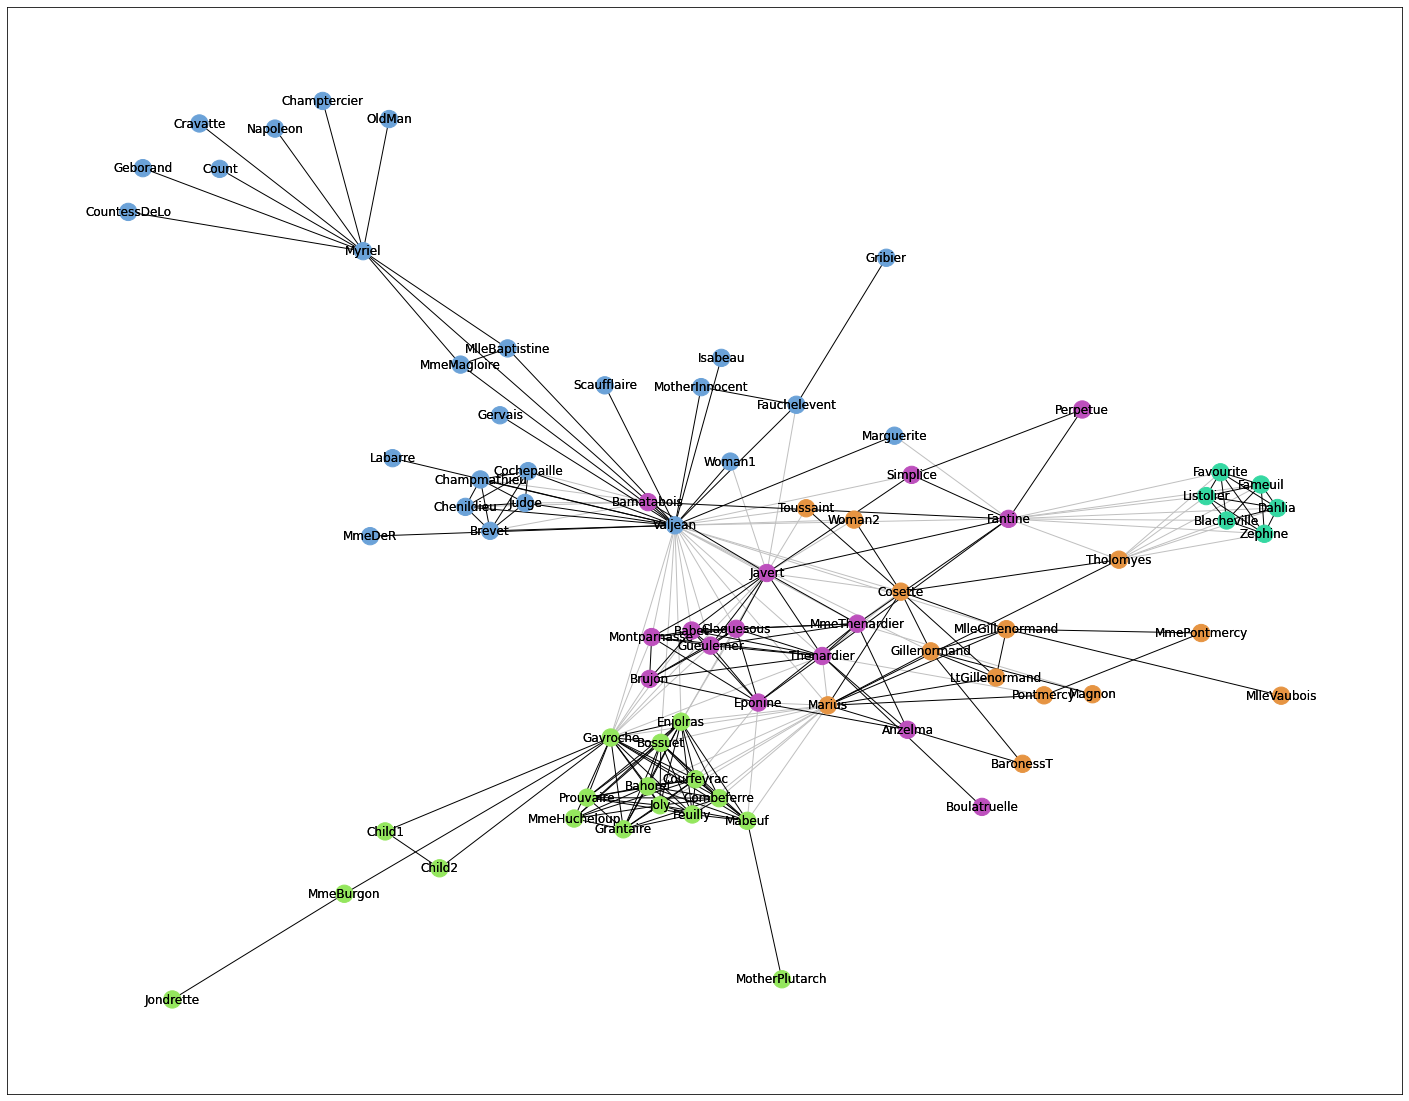

In [41]:
plt.rcParams.update({'figure.figsize': (25,20)})

nx.draw_networkx(g,
                pos=modul_pos,
                node_size=0,
                edgelist=external,
                edge_color='silver')

nx.draw_networkx(g,
                pos=modul_pos,
                node_color=node_color,
                edgelist=internal,
                edge_color=internal_color)

#### greedy_modularity_communities 함수를 이용하여 modularity를 구하였을 때, 가장 최적의 커뮤니티 개수는 5인 것으로 나타났다. 

###  2.2.2 Girvan Newman

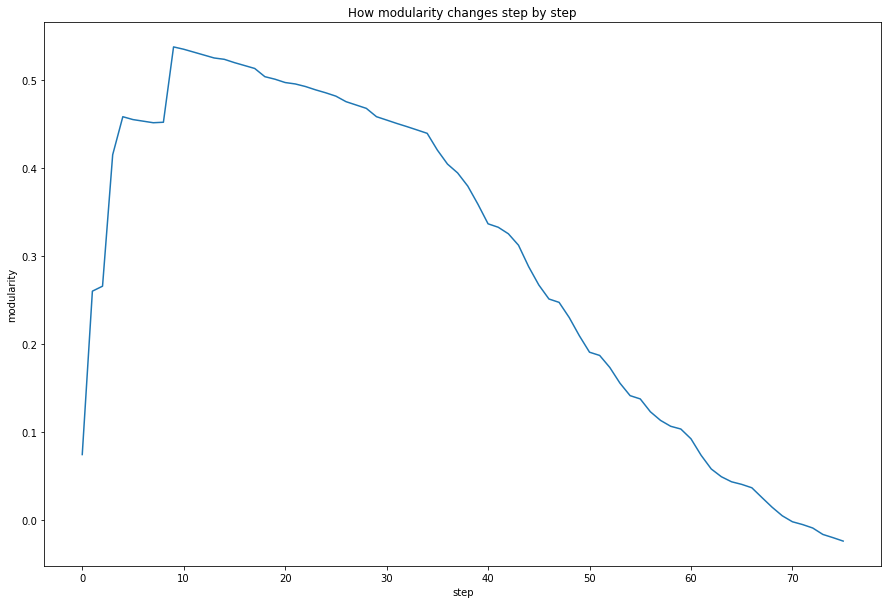

In [32]:
#Partitions via centrality measures #girvan_newman

girnew_com = nxcom.girvan_newman(g)

step = 0
log_step = []
log_modularity = []
log_length=[]

for groups in girnew_com:
    m = nxcom.modularity(g, communities=groups)
    log_modularity = log_modularity + [m]
    log_step = log_step + [step]
    log_length= log_length + [len(groups)]
    step = step + 1


fig = plt.figure()
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.plot(log_step, log_modularity)
plt.xlabel('step')
plt.ylabel('modularity')
plt.title("How modularity changes step by step")
plt.show(block=False)

In [33]:
step_mod = list(zip(log_step, log_modularity, log_length))
step_mod.sort(key=lambda x: x[1], reverse=True)
step_mod[0:3]

[(9, 0.5380680761361524, 11),
 (10, 0.5354175708351417, 12),
 (11, 0.5321160642321284, 13)]

#### Girvan Newman 알고리즘을 활용하여 가장 높은 modularity를 가질 때의 커뮤니티 개수를 계산하고 각 step마다 modularity의 변화 양상을 그래프로 시각화하였다. 
#### 알고리즘의 9번째 step, 즉 전체 네트워크가 betweenness centrality를 기준으로 11개의 커뮤니티로 나뉘었을 때 가장 높은 modularity를 가짐을 확인할 수 있다.

### 2.2 소설 내용과의 비교, 평가 (시각화)

#### Girvan Newman 알고리즘의 9번째 step에서, 레미제라블의 인물 커뮤니티가 어떻게 표현되는지 시각화해보았다.

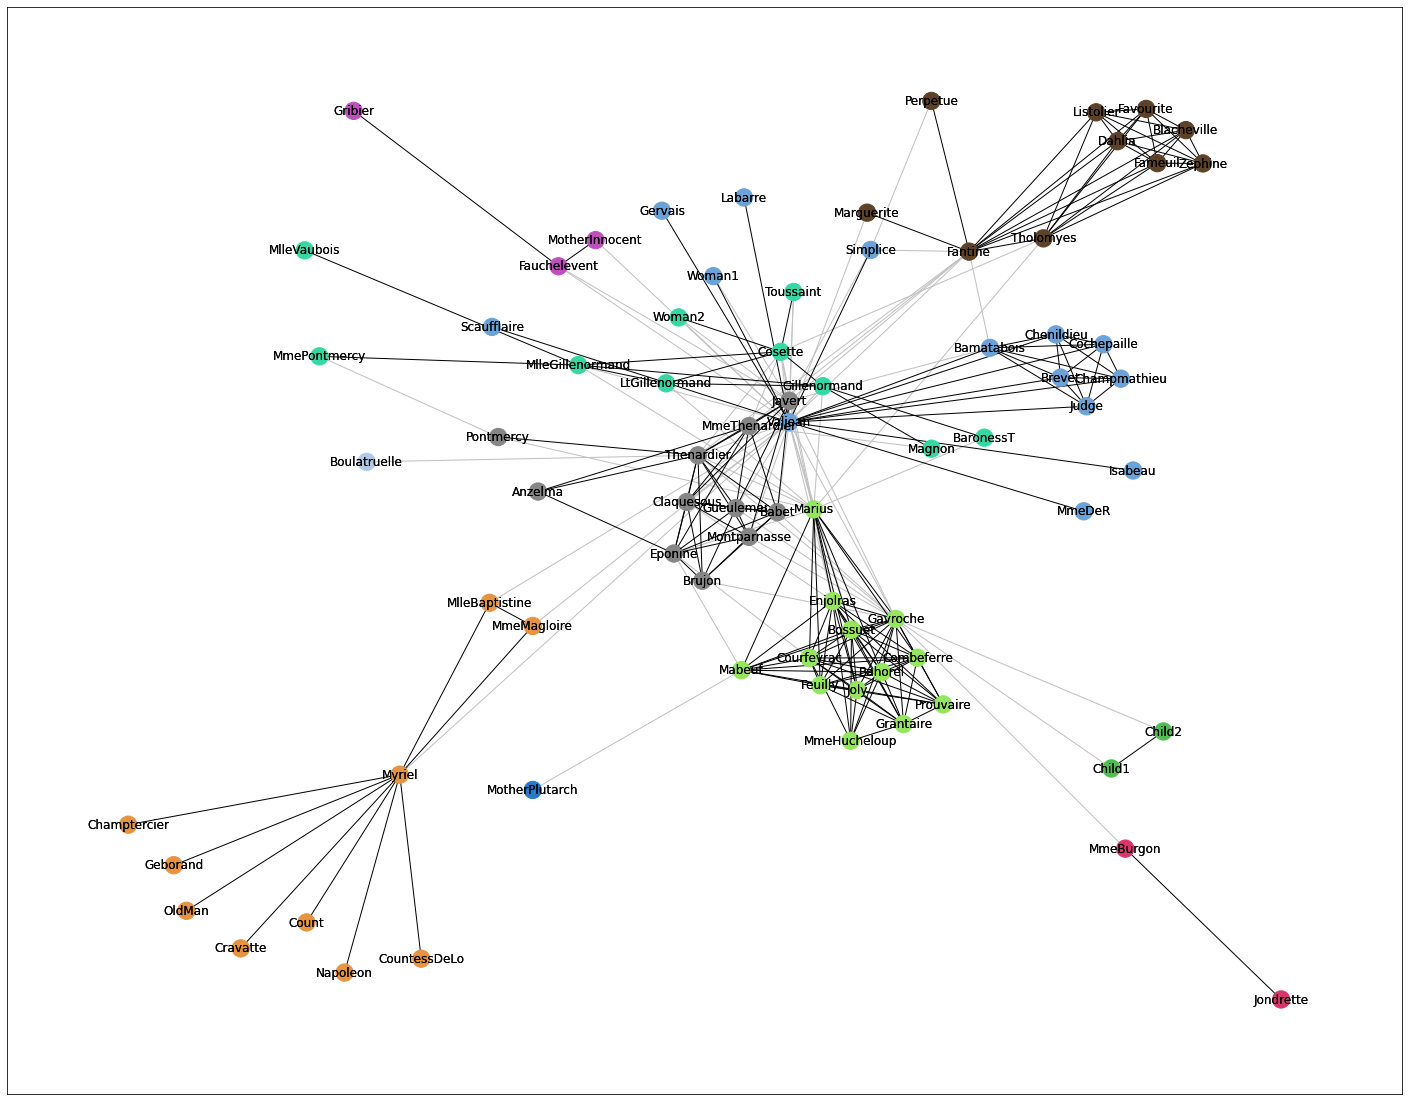

In [42]:
girnew_com = nxcom.girvan_newman(g)

for groups in girnew_com:
    if len(groups) == 11:
        set_node_community(g, groups)
        set_edge_community(g, groups)

        node_color = [get_color(g.nodes[v]['community']) for v in g.nodes]

        external = [(v,w) for v,w in g.edges if g.edges[v,w]['community'] == 0]
        internal = [(v,w) for v,w in g.edges if g.edges[v,w]['community'] > 0]
        internal_color = ['black' for e in internal]

        modul_pos = nx.spring_layout(g)

        plt.rcParams.update({'figure.figsize': (25, 20)})

        nx.draw_networkx(g,
                        pos=modul_pos,
                        node_size=0,
                        edgelist=external,
                        edge_color='silver')

        nx.draw_networkx(g,
                        pos=modul_pos,
                        node_color=node_color,
                        edgelist=internal,
                        edge_color=internal_color)

### 2.3 커뮤니티는 몇 개가 적당할까?: Community Detection 비교
: Girvan Newman 알고리즘 기반의 Community Detection의 결과를, greedy_modularity_communities를 이용하여 5개의 커뮤니티로 나누었던 앞전 경우와 비교해보자.

#### 공통점
- 학생 혁명단에서 봉기를 일으켰던 마리우스, 앙졸라, 가브로슈가 동일한 커뮤니티에 속해있다.
- 부모이지만 아들을 제대로 돌보지 않았던 테나르디에는 가브로슈와 거리도 먼 편이며 서로 다른 커뮤니티에 속해 있다. 
- 모녀관계인 팡틴과 코제트는 서로 거리가 가깝지만 다른 커뮤니티에 속해 있다.

#### 차이점
- 5개의 커뮤니티가 아닌, 11개의 커뮤니티로 구분되어 있다.
- 장발장과 미리엘이 서로 다른 커뮤니티로 구분되어 있다. 
- 자베르, 테나르디에, 에포닌은 동일한 커뮤니티에 속해 있지만, 팡틴은 이들과 다른 커뮤니티로 구분되었다.(greedy_modularity에서는 팡틴 역시 이들 세 명과 동일한 커뮤니티에 속해 있다.) 실제로 에포닌은 테나르디에 부부의 응석받이 장녀로 서로 가까운 관계인 반면, 팡틴은 주인공 장발장의 연민의 대상이자 자신의 딸 코제트를 테나르디에 부부에게 맡겼으나 부부가 코제트를 노예처럼 부렸다는 사실을 숨기고 가난한 팡틴으로부터 거액의 양육비를 요구하기도 하였다. 즉 팡틴과 테나르디에 부부는 서로 물리적으로는 가까우나 인물의 성격/특성 상 동일한 커뮤니티에 속하는 것이 어색하다.

- greedy_modularity 기반에서는 마리우스와 코제트가 동일한 커뮤니티에 속한 것과 달리, Girvan Newman 알고리즘의 step 9에서는 둘이 서로 다른 커뮤니티로 구분되어있다. 실제로 이들은 애인 관계이긴 하나 마리우스가 속해 있는 커뮤니티는 공화당 기반의 혁명 단체와 관련이 많으며, 코제트는 이 혁명에 직접 가담하지 않으므로 서로 다른 커뮤니티에 속해 있는 것이 더 자연스럽다고 볼 수 있다.

#### 결론
- 비록 완벽한 것은 아니지만, Girvan Newman 알고리즘 기반의 Community Detection을 통해 11개의 community로 구분하는 것이  greedy_modularity_communities를 활용하여 5개의 community로 구분하는 것보다 레미제라블의 인물 관계를 더 잘 표현한다고 판단하였다.

#### 본 프로젝트에서 Community Detection의 한계
- Community의 정의 및 Community Detection의 목적을 엄밀히 설정하는 것이 선행되어야 한다.
- 단순히 만남/대화의 횟수 데이터만으로는 이들이 물리적으로 가까운지, 혹은 정서적으로 가까운지 구분하기 어렵다. 다시 말해, 두 인물이 함께 가담한 사건이 많은 것인지, 서로 비슷한 성격/특성을 공유하고 있는 것인지 구분하기 어렵다.
- 한국에서 인물 관계도를 표현할 때 부모와 자식을 하나의 community로 연결하는 것이 자연스러운데, 만남/대화 횟수 데이터를 기반으로 community detection을 진행하니 가족 정보와 상관 없이 '실제로 얼마나 가까운 관계인가'의 정보가 중시되었다.
- 소설이 전개되면서 특정 계기로 인하여 초반에 서로 멀었던 인물이 이후 가까워지는 것과 같이 인물 관계가 유동적으로 변화하는 경우가 있다. 그러나, 양적 데이터를 기반으로 하는 community detection에서는 이러한 변화 양상을 입체적으로 표현하지 못한다는 한계가 있다.